# 8. 텍스트 분석

In [1]:
# 구글 드라이브와 연결
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**NLP** : 머신이 인간의 언어를 이해하고 해석하는 데 중점

- 텍스트 분석을 향상하게 하는 기반 기술! 언어 해석을 위한 기계 번역, 질의응답 시스템



**텍스트 분석** : (텍스트 마이닝) 비정형 텍스트에서 의미 있는 정보를 추출하는 것에 중점

- 머신러닝, 언어 이해, 통계 등을 활용해 모델을 수립하고 정보를 추출해 비즈니스 인텔리전스나 예측 분석 등의 분석 작업을 주로 수행

   - 텍스트 분류(Text Classification)
   - 감성 분석(Sentiment Analysis)
   - 텍스트 요약(Summarization)
   - 텍스트 군집화/유사도 측정

## 01. 텍스트 분석 이해

**텍스트 분석은 비정형 데이터인 텍스트를 분석함을 의미**

- 비정형 텍스트 데이터를 어떻게 피처 형태로 추출하고, 어떻게 추출된 피처에 의미 있는 값을 부여하는가?

**피처 벡터화(Feature Vectorization)** & **피처 추출(Feature Extraction)**  
: 텍스트를 word 기반의 다수의 피처로 추출해 단어 빈도수와 같은 숫자값을 부여해 벡터값으로 표현 가능하게 텍스트 변환하는 작업

→ BOW(Bag of Words)와 Word2Vec 방법 두 개중 **BOW** 활용

- 텍스트를 벡터값을 가지는 피처로 변환하는 것은 머신러닝 모델 적용전 수행해야 할 아주 중요한 요소!

### 텍스트 분석 수행 프로세스

1. **텍스트 사전 준비작업(텍스트 전처리)** : 텍스트를 피처로 만들기 전에 클렌징, 대/소문자 변경, 특수문자 삭제 등의 클렌징 작업 // 단어(word) 등의 토큰화 작업 // 의미 없는 단어(Stop word) 제거 작업 // 어근 추출(Stemming/Lemmatization) 등의 텍스트 정규화 작업 수행을 통칭

2. **피처 벡터화/추출** : 1번으로 가공된 텍스트에서 피처 추출, 벡터 값을 할당한다. BOW, Word2Vec 이 있고, __BOW__는 Count 기반과 TF-IDF 기반 벡터화가 있다.

3. **ML 모델 수립 및 학습/예측/평가** : 2된 데이터 세트에 ML 모델을 적용해 학습/예측/평가 수행

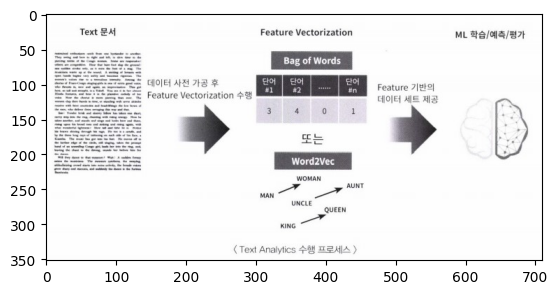

In [3]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/텍스트분석수행프로세스.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

### 파이썬 기반의 NLP, 텍스트 분석 패키지

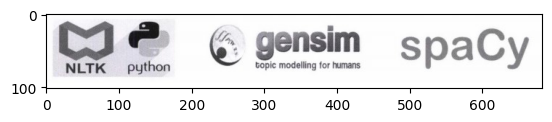

In [4]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/파이썬기반NLP텍스트분석패키지.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

**NLTK(National Language Toolkit for Python)** : 파이썬의 대표 NLP 패키지. 방대한 데이터 세트와 서브 모듈을 가지고 있으며 NLP의 거의 모든 영역을 커버하고 있음. 많은 NLP 패키지가 NLTK를 기반으로 작성되지만 수행속도 측면에서 좋지 않아 제대로 활용되지 않음

**Gensim** : 토픽 모델링 분야에서 가장 두각을 나타내는 패키지. 토픽 모델링을 쉽게 구현할 수 있는 기능을 제공하며 Word2Vec 구현 등의 신기능 제공

**SPaCy** : 뛰어난 수행 성능으로 최근 가장 주목 받는 패키지. 많은 NLP 어플리케이션에서 사용


→ 사이킷런은 머신러닝 위주의 라이브러리여서 NLP 패키지에 특화된 라이브러리는 없지만, 충분히 텍스트 분석 기능을 수행할 수 있음!


→ 보통은 더 다양한 텍스트 분석을 적용해야 할 때 위의 NLP 전용 패키지와 결합해 작성하는 경우가 많다.

## 02 텍스트 사전 준비 작업(텍스트 전처리) - 텍스트 정규화

텍스트 자체를 바로 피처로 만들 수 없고, 사전에 텍스트를 가공하는 준비 작업이 필요

**텍스트 정규화는 텍스트를 머신러닝 알고리즘이나 NLP 어플리케이션에 입력 데이터하기 위해 사전 작업을 수행하는 것을 의미한다.** 매우 중요!

- 클렌징(Cleasning)
- 토큰화(Tokenization  
- 필터링/스톱 워드 제거/철자 수정
- Stemming
- Lemmatization

### 클렌징

불필요한 문자, 기호 등을 사전에 제거하는 작업 / HTML, XML 태그나 특정 기호 등을 사전에 제거


### 텍스트 토큰화

문서에서 문장을 분리하는 **문장 토큰화** & 문장에서 단어를 분리하는 **단어 토큰화**

- **문장 토큰화(sentence tokenization)** : 문장의 마침표, 개행문자 등 문장의 마지막을 뜻하는 기호에 따라 분리하는 것이 일반적임. 정규 표현식에 따른 문장 토큰화도 가능 !

3개의 문장으로 이루어진 텍스트를 문장으로 분리

In [6]:
from nltk import sent_tokenize
import nltk
nltk.download('punkt')

text_sample='The Matrix is everywhere its all around us, here even in this room. \
            You can see it out your window or on your television. \
            You feel it when you go to work, or go to church or pay your taxes.'
sentences=sent_tokenize(text=text_sample)
print(type(sentences), len(sentences))
print(sentences) 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


- **단어 토큰화(Word Tokenization)** : 문장을 단어로 토큰화. 공백, 콤마, 마침표, 개행문자 등으로 분리하지만 정규 표현식을 이용해 다양한 유형으로 분리할 수 있음!

BOW와 같이 단어의 순서가 중요하지 않은 경우 문장이 아닌 단어 토큰화만 사용해도 충분



In [7]:
from nltk import word_tokenize

sentence='The Matrix is everywhere its all around us, here even in this room.'
words=word_tokenize(sentence)
print(type(words), len(words))
print(words) 

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


sent_tokenize, word_tokenize를 조합해 문서에 대해 모든 단어를 토큰화

문장별로 단어 토큰화를 하기 위해 문장을 나누고 다시 단어로 토큰화하는 tokenize_text( ) 함수 작성

In [8]:
from nltk import word_tokenize, sent_tokenize

# 여러 개의 문장으로 입력된 데이터를 문장별로 단어 토큰화하는 함수 생성
def tokenize_text(text):
    # 문장별로 분리
    sentences=sent_tokenize(text)
    # 분리된 문장별 단어 토큰화
    word_tokens=[word_tokenize(sentence) for sentence in sentences]
    return word_tokens

# 여러 문장에 대해 문장별 단어 토큰화 수행
word_tokens=tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens) 

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


word_tokens 는 3개의 리스트를 가진 리스트! 내포된 개별 리스트는 각 문장별 토큰화된 단어를 요소로 가짐

__n-gram__은 연속된 n개의 단어를 하나의 토큰화 단위로 분리해 낸다.문맥적 의미 무시하지 않기 위해 도입



### 스톱 워드 제거

**스톱워드** : 분석에 큰 의미가 없는 단어 / is, the, a, will -

**스톱워드는 문법상 빈번하게 나타나 사전에 제거하지 않으면 중요 단어로 인지될 수 있다.**

NLTK의 stopwords 목록을 내려 받는다. 언어별로 이러한 스톱워드가 목록화되어 있음

In [9]:
import nltk 
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

영어의 경우 몇 개의 스톱워드가 있는지 알아보고 20개 확인

In [10]:
print('영어 스톱워드 개수:', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20]) 

영어 스톱워드 개수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


앞에서 했던 word_tokens 리스트에서 스톱워드를 필터링해 분석에 의미 있는 단어만 추출

In [11]:
import nltk

stopwords=nltk.corpus.stopwords.words('english')
all_tokens=[]

# 위 예제에서 3개의 문장별로 얻은 word_tokens 리스트에서 스톱워드를 제거하는 반복문
for sentence in word_tokens:
    filtered_words=[]
    for word in sentence:
        # 모두 소문자로 변환
        word=word.lower()
        # 토큰화된 개별 단어가 스톱워드에 포함되지 않으면 word_tokens에 추가
        if word not in stopwords:
            filtered_words.append(word)
    all_tokens.append(filtered_words)
    
print(all_tokens) 

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


is, this 와 같은 스톱워드 제거

### Stemming, Lemmatization

**문법에 따라 다양하게 변하는 단어의 원형을 찾아줍니다**

- **Stemming** : 원형 단어로 변환 시 일반적인 방법을 적용하거나 더 단순화된 방법을 적용해 원래 단어에서 일부 철자가 훼손된 어근 단어를 추출

- **Lemmatization** : 품사와 같은 문법적인 요소와 더 의미적인 부분을 감안해 정확한 철자로 된 어근 단어를 찾아줌 > 오랜 시간 필요

NLTK에서 Stemmer(Porter, Lancaster, Snowball Stemmer) // Lemmatization(WordNetLemmatizer) 제공



In [12]:
from nltk.stem import LancasterStemmer
stemmer=LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('works'), stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused'))
print(stemmer.stem('happier'), stemmer.stem('happiest'))
print(stemmer.stem('fancier'), stemmer.stem('fanciest')) 

work work work
amus amus amus
happy happiest
fant fanciest


stemmer 객체를 생성하고 stem('단어')를 호출하면 '단어'의 stemming이 가능

ing, s, ed가 붙은 단어나 비교급, 최상급으로 변형된 단어의 원형은 제대로 못 찾음



In [14]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing','v'),lemma.lemmatize('amuses','v'),lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'),lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'),lemma.lemmatize('fanciest','a')) 

[nltk_data] Downloading package wordnet to /root/nltk_data...


amuse amuse amuse
happy happy
fancy fancy


lemma 객체 생성 후 lemmatize('단어', '품사') 입력 // 동사 'v', 형용사 'a'

stemmer보다 정확하게 원형 단어 추출


## 03 BOW - Bag of Words

**문서가 가지는 모든 단어를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도 값을 부여해 피처 값을 추출하는 모델로, 문서 내의 모든 단어를 한번에 봉투에 넣고 흔들어 섞는 것과 같음.**

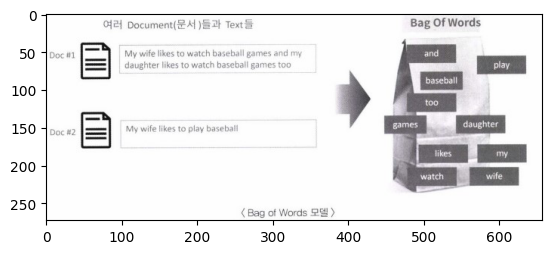

In [15]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/BagofWords.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

My wife likes to watch baseball games and my daughter likes to watch baseball games too  
My wife likes to play baseball

**위의 두 문장을 가지고 BOW 기반 피처 추출**

1. 두 문장에 있는 모든 단어에서 중복을 제거하고 각 단어(featuer/term)를 칼럼 형태로 나열, 고유 인덱스 부여  
    - 'and':0, 'baseball':1, 'daughter':2, -

2. 개별 문장에서 해당 단어가 나타나는 횟수(Occurence)를 각 단어(인덱스)에 기재.

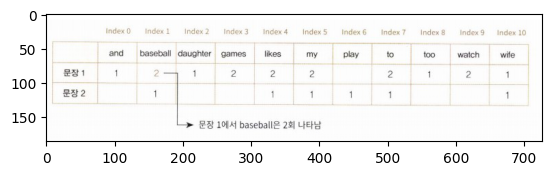

In [16]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/BagofWords2.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

**< BOW 모델 >**
 
**[ 장점 ]**  
- **쉽고 빠른 구축** : 단순히 단어 발생 횟수에 기반하지만 문서의 특징을 잘 나타낸다

**[ 단점 ]**
- **문맥 의미(Semantic Context) 반영 부족** : 단어의 순서를 고려하지 않기 때문에 문맥적인 의미가 무시됨. 보완을 위해 n_gram 기법을 활용할 수 있지만 제한적이기 때문에 문맥적인 해석 처리 불가

- **희소 행렬 문제(희소성, 희소 행렬)** : BOW로 피처 벡터화를 수행하면 희소 행렬 데이터 세트가 만들어지기 쉬움. 매우 많은 단어가 칼럼으로 만들어지고 같은 단어가 문서마다 나타나지 않는 경우가 훨씬 많음. 대부분의 데이터가 0으로 채워지고, 이를 __희소 행렬__이라고 한다. 반대로 0이 아닌 의미 있는 값으로 채워지는 행렬을 __밀집 행렬__이라고 함. 희소 행렬은 ML 알고리즘 수행 시간과 예측 성능을 떨어뜨리기 떄문에 이를 위한 특별한 기법이 마련돼야 함

### BOW 피처 벡터화

머신러닝 알고리즘은 숫자형 피처를 데이터로 입력 받아 동작하기 때문에  
텍스트를 특정 의미를 가지는 숫자형 값인 벡터로 변환해야 한다. **피처 벡터화** 수행!

BOW 모델에서 피처 벡터화를 수행하는 두가지 방식

- **카운트 기반 벡터화**

    : 단어에 피처 값을 부여할 때 각 문서에서 해당 언어가 나타나는 횟수(count)를 부여하는 경우 카운트 값이 높을수록 중요한 단어로 인식되지만, 언어의 특성상 자주 사용되는 단어까지 중요하게 인식될 수 있어서 개선한 모델이 TF-IDF

- **TF-IDF**

    : 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 자주 나타나는 단어에는 패널티를 주는 방식으로 값 부여 → 가중치의 균형을 맞춘다. 
    문서마다 텍스트가 길고, 문서의 개수가 많은 경우엔 TF-IDF 방식을 사용하는 것이 
    더 좋은 예측 성능을 보장

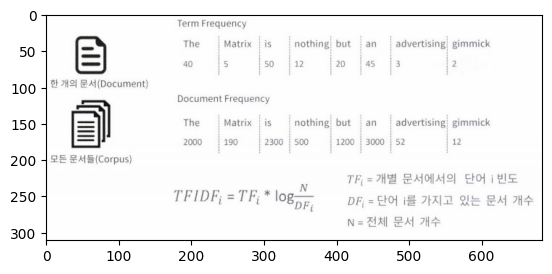

In [17]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/TF-IDF.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

### 사이킷런 count, TF-IDF 구현: CountVectorizer, TfidfVectorizer

**CountVectorizer**  
피처 벡터화 + 소문자 일괄 변환, 토큰화, 스톱워드 필터링 등의 전처리

- fit 과 transform으로 피처 벡터화된 객체 반환


<br>
1.영어의 경우 모든 문자 소문자로 변환 등의 전처리 수행

2.단어 기준 n_gram_range를 반영해 각 단어 토큰화

3.텍스트 정규화 수행

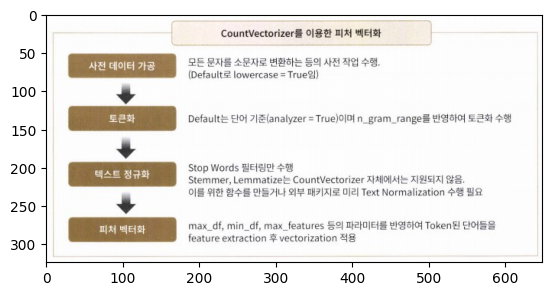

In [18]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/CountVectorizer.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

### BOW 벡터화를 위한 희소 행렬

CountVectorizer, TfidfVectorizer로 텍스트를 피처 단위로 벡터화해 변환하고 CSR 형태의 희소 행렬 반환

모든 문서에 있는 단어를 추출해 피처로 벡터화하는 방법은 필연적으로 많은 피처 칼럼을 만들 수 밖에 없고, 만들어진 대규모 행렬의 대부분은 0 값을 가진다. 이를 **희소 행렬**이라고 하고, **BOW 형태를 가진 언어 모델의 피처 벡터화는 대부분 희소 행렬**

**희소행렬은 너무 많은 불필요한 0값이 메모리 공간에 할당되어 공간이 많이 필요하고, 액세스 시간이 오래 걸린다. 이러한 희소 행렬을 물리적으로 적은 메모리 공간을 차지하도록 변환하기 위해 __COO, CSR 형식**을 이용한다. 보통은 CSR의 저장, 계산 수행 능력이 더 뛰어나기 때문에 많이 사용

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/BOW벡터화를위한희소행렬.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

### 희소행렬 - COO 형식

**COO(Coordinate, 좌표) 형식** : 0이 아닌 데이터만 별도의 데이터 배열에 저장하고, 그 데이터가 가리키는 행과 열의 위치를 별도의 배열로 저장하는 방식


- 희소 행렬 반환을 위해 주로 Scipy를 이용, Scipy의 sparse 패키지는 희소 행렬 변환을 위한 다양한 모듈을 제공한다.

In [19]:
import numpy as np

dense=np.array([[3,0,1],[0,2,0]]) 

사이파이의 coo_matrix 클래스를 이용, COO 형식의 희소 행렬로 변환

In [20]:
from scipy import sparse

# 0이 아닌 데이터 추출
data=np.array([3,1,2])

# 행 위치와 열 위치를 각각 배열로 생성
row_pos=np.array([0,0,1])
col_pos=np.array([0,2,1])

# sparse 패키지의 coo_matrix를 이용해 COO 형식으로 희소 행렬 생성
sparse_coo=sparse.coo_matrix((data, (row_pos, col_pos))) 

toarray( )를 이용해 밀집 형태의 행렬로 출력

In [21]:
sparse_coo.toarray() 

array([[3, 0, 1],
       [0, 2, 0]])

원래의 데이터로 행렬 추출

### 희소행렬 - CSR 형식

**CSR(Compressed Spare Row) 형식** : COO 형식의 행과 열의 위치를 나타내기 위해 반복적인 위치 데이터를 사용해야 하는 문제점을 해결한 방식

In [22]:
# 아래의 2차원 배열을 COO 형식으로 변환
[[0,0,1,0,0,5], [1,4,0,3,2,5], [0,6,0,3,0,0], [2,0,0,0,0,0], [0,0,0,7,0,8], [1,0,0,0,0,0]]

[[0, 0, 1, 0, 0, 5],
 [1, 4, 0, 3, 2, 5],
 [0, 6, 0, 3, 0, 0],
 [2, 0, 0, 0, 0, 0],
 [0, 0, 0, 7, 0, 8],
 [1, 0, 0, 0, 0, 0]]

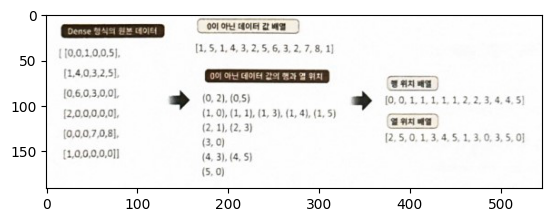

In [27]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/CSR형식.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

**0이 아닌 데이터를 순서대로 나열**
> [1,5,1,4,3,2,5,6,3,2,7,8,1]

**위의 0이 아닌 값의 자리**

>(0,2) (0,5)  
>(1,0) (1,1) (1,3) (1,4) (1,5)  
>(2,1) (2,3)  
>(3,0)  
>(4,3) (4,5)  
>(5,0)

**행 위치 배열**
> [0,0,1,1,1,1,1,2,2,3,4,4,5]

**열 위치 배열**
> [2,5,0,1,3,4,5,1,3,0,3,5,0]

**겹치는 값의 첫번째 인덱스로 변경**
> [0,2,7,9,10,12,13]

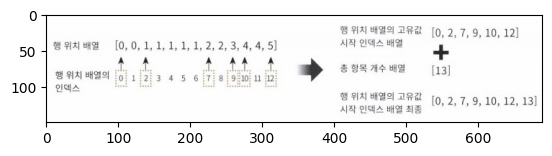

In [28]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/CSR형식2.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

- 고유값의 시작 위치만 알고 있으면 행 위치 배열을 다시 만들 수 있기 때문에 COO 방식보다 메모리가 적게 들고 빠른 연산이 가능하다.


사이파이의 csr_matrix 클래스로 구현 가능

In [23]:
from scipy import sparse

dense2=np.array([[0,0,1,0,0,5],
                 [1,4,0,3,2,5],
                 [0,6,0,3,0,0],
                 [2,0,0,0,0,0],
                 [0,0,0,7,0,8],
                 [1,0,0,0,0,0]])

# 0이 아닌 데이터 추출
data2=np.array([1,5,1,4,3,2,5,6,3,2,7,8,1])

# 행 위치, 열 위치를 각각 array로 생성
row_pos=np.array([0,0,1,1,1,1,1,2,2,3,4,4,5])
col_pos=np.array([2,5,0,1,3,4,5,1,3,0,3,5,0])

# COO 형식으로 변환
sparse_coo=sparse.coo_matrix((data2, (row_pos, col_pos)))

# 행 위치 array의 고유값 시작 위치 인덱스를 배열로 생성
row_pos_ind=np.array([0,2,7,9,10,12,13])

# CSR 형식으로 변환
sparse_csr=sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 됐는지 Dense 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 됐는지 Dense 출력 확인')
print(sparse_csr.toarray()) 

COO 변환된 데이터가 제대로 됐는지 Dense 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 됐는지 Dense 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


실제 사용 시 밀집 행렬을 생성 파라미터로 입력하면 COO, CSR 희소 행렬로 생성

In [24]:
dense3=np.array([[0,0,1,0,0,5], 
                 [1,4,0,3,2,5],
                 [0,6,0,3,0,0],
                 [2,0,0,0,0,0],
                 [0,0,0,7,0,8],
                 [1,0,0,0,0,0]])

coo=sparse.coo_matrix(dense3)
csr=sparse.csr_matrix(dense3) 

사이킷런의 CountVectorizer, TfidfVectorizer 클래스로 변환된 피처 벡터화 행렬은 모두 사이파이 CSR 형태의 희소행렬

## 04 텍스트 분류 실습 - 20 뉴스그룹 분류

fetch_20newsgroups( )를 이용해 예제 데이터 제공  
로지스틱 회귀를 이용해 분류 수행


1. 텍스트 기반의 분류 > 텍스트 정규화 > 피처 벡터화 적용
2. 카운트 기반, TF-IDF 기반의 벡터화를 차례로 적용해 예측 성능 비교
3. 피처 벡터화를 위한 파라미터, GridSearchCV 기반 튜닝,  
사이킷런 Pipeline을 통해 피처 벡터화 파라미터, GridSearchCV 기반 튜닝을 한번에 수행

### 텍스트 정규화

fetch_20newsgroups : 인터넷으로 데이터를 받은 후 컴퓨터에 로딩

In [29]:
from sklearn.datasets import fetch_20newsgroups

news_data=fetch_20newsgroups(subset='all', random_state=156)

In [30]:
print(news_data.keys()) 

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [31]:
# 타깃 클래스 구성 확인
import pandas as pd

print('target 클래스의 값, 분포도 \n', pd.Series(news_data.target).value_counts().sort_index())
print('target 클래스의 이름들 \n', news_data.target_names) 

target 클래스의 값, 분포도 
 0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628
dtype: int64
target 클래스의 이름들 
 ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


target 값이 0부터 19까지 20개로 구성  
개별 데이터가 텍스트로 어떻게 구성되어 있는지 한개만 추출해 확인

In [32]:
print(news_data.data[0]) 

From: egreen@east.sun.com (Ed Green - Pixel Cruncher)
Subject: Re: Observation re: helmets
Organization: Sun Microsystems, RTP, NC
Lines: 21
Distribution: world
Reply-To: egreen@east.sun.com
NNTP-Posting-Host: laser.east.sun.com

In article 211353@mavenry.altcit.eskimo.com, maven@mavenry.altcit.eskimo.com (Norman Hamer) writes:
> 
> The question for the day is re: passenger helmets, if you don't know for 
>certain who's gonna ride with you (like say you meet them at a .... church 
>meeting, yeah, that's the ticket)... What are some guidelines? Should I just 
>pick up another shoei in my size to have a backup helmet (XL), or should I 
>maybe get an inexpensive one of a smaller size to accomodate my likely 
>passenger? 

If your primary concern is protecting the passenger in the event of a
crash, have him or her fitted for a helmet that is their size.  If your
primary concern is complying with stupid helmet laws, carry a real big
spare (you can put a big or small head in a big helmet, bu

뉴스그룹 제목, 작성자, 소속, 이메일, 내용 등 많은 정보를 가지고 있음 **내용을 제외한 정보 제거**

**remove** 파라미터를 이용해 기사의 **header, footer**를 제거할 수 있음
**subset** 파라미터를 이용해 학습/테스트 데이터 분리해 다운받을 수 있음

In [33]:
from sklearn.datasets import fetch_20newsgroups

# subset='train'으로 학습 데이터 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출
train_news=fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), random_state=156)
X_train=train_news.data
y_train=train_news.target

# subset='test'로 테스트 데이터 추출
test_news=fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), random_state=156)
X_test=test_news.data
y_test=test_news.target

print('학습 데이터 크기 {0}, 테스트 데이터 크기 {1}'.format(len(train_news.data), len(test_news.data))) 

학습 데이터 크기 11314, 테스트 데이터 크기 7532


### 피처 벡터화 변환 & 머신러닝 모델 학습/예측/평가

학습 데이터 11314개 리스트, 테스트 데이터 7532개 리스트
**CountVectorizer를 이용해 학습데이터의 텍스트를 피처 벡터화**


CountVectorizer를 이용할 땐 반드시 학습 데이터로 fit 한 객체를 이용해 테스트 데이터를 변환해야 함

> 학습 시 설정된 피처 개수 == Countvectorizer로 변환할 피처 개수


테스트 데이터 피처 벡터화시 fit_transform 이용 X

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorizer 로 피처 벡터화 수행
cnt_vect=CountVectorizer()
cnt_vect.fit(X_train, y_train)
X_train_cnt_vect=cnt_vect.transform(X_train)

# 학습 데이터로 fit 된 CountVectorizer 이용해 테스트 데이터 피처 벡터화 수행
X_test_cnt_vect=cnt_vect.transform(X_test)

print('학습 데이터 텍스트의 CountVectorizer Shape:', X_train_cnt_vect.shape) 

학습 데이터 텍스트의 CountVectorizer Shape: (11314, 101631)


학습 데이터를 CountVectorizer 로 피처 추출한 결과 11314개의 문서에서 단어 101631개로 만들어졌음

로지스틱 회귀를 적용해 뉴스그룹에 대한 분류 예측

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# LogisticRegression을 이용해 학습/예측/평가
lr_clf=LogisticRegression()
lr_clf.fit(X_train_cnt_vect, y_train)
pred=lr_clf.predict(X_test_cnt_vect)
print('CountVectorizer Logistic Regression 예측 정확도 {0:.3f}'.format(accuracy_score(y_test, pred))) 

CountVectorizer Logistic Regression 예측 정확도 0.606


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Count 기반 예측 정확도 : 약 0.607

TF-IDF 기반으로 벡터화 변경해 예측 수행

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 벡터화 적용 > 학습/테스트 데이터 세트 변환
tfidf_vect=TfidfVectorizer()
tfidf_vect.fit(X_train)
X_train_tfidf_vect=tfidf_vect.transform(X_train)
X_test_tfidf_vect=tfidf_vect.transform(X_test)

# Logistic Regression 이용해 학습/예측/평가
lr_clf=LogisticRegression()
lr_clf.fit(X_train_tfidf_vect, y_train)
pred=lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Logistic Regression 예측 정확도 {0:.3f}'.format(accuracy_score(y_test, pred))) 

TF-IDF Logistic Regression 예측 정확도 0.674


TF-IDF가 0.674로 단순 카운트 기반보다 훨씬 높은 예측 정확도를 낸다.

일반적으로 문서 내에 텍스트가 많고, 많은 문서를 가지는 텍스트 분석에는 TF-IDF 벡터화가 좋은 결과 도출


TF-IDF 에 다양한 파라미터 적용하고 예측 성능 측정

In [37]:
# stop words 필터링 추가, ngram (1,1) > (1,2)로 변경
tfidf_vect=TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=300)
tfidf_vect.fit(X_train)
X_train_tfidf_vect=tfidf_vect.transform(X_train)
X_test_tfidf_vect=tfidf_vect.transform(X_test)

lr_clf=LogisticRegression()
lr_clf.fit(X_train_tfidf_vect, y_train) 
pred=lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression 예측 정확도 {0:.3f}'.format(accuracy_score(y_test, pred)))

KeyboardInterrupt: ignored

GricSearchCV 를 이용해 로지스틱 회귀의 하이퍼 파라미터 최적화 수행

In [ ]:
from sklearn.model_selection import GridSearchCV

# 최적 C 값 도출 튜닝 수행, CV는 3폴드 세트로 설정
params={'C':[0.01, 0.1, 1, 5, 10]}
grid_cv_lr=GridSearchCV(lr_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv_lr.fit(X_train_tfidf_vect, y_train)
print('Logistic Regression best C parameter :', grid_cv_lr.best_params_)

# 최적 C 값으로 학습된 grid_cv로 예측/정확도 평가
pred=grid_cv_lr.predict(X_test_tfidf_vect)
print('TF-IDF Vecotrized Logistic Regression 예측 정확도 {0:.3f}'.format(accuracy_score(y_test, pred)))

C가 일때 GricSearchCV의 교차 검증 테스트 세트에서 가장 좋은 예측 성능을 나타내고, 성능 수치가 향상됨

### 사이킷런 Pipeline 사용 & GridSearchCV와 결합

사이킷런의 Pipeline을 이용해 피처 벡터화, ML 알고리즘 학습/예측을 위한 코드 작성을 한번에!


- 데이터의 전처리와 머신러닝 학습과정을 통일된 API 기반에서 처리 > 직관적인 ML 코드 작성

- 모든 데이터 전처리 작업, Estimator를 결합할 수 있음  
e.g) 스케일링(or 피처 벡터화), PCA 등의 변환 작업 & 분류, 회귀 등의 Estimator 한번에 결합

In [ ]:
pipeline=Pipeline([('tfidf_vect', TfidfVectorizer(stop_words='english')), 
                   ('lr_clf', LogisticRegression(radnom_state=156))]) 

In [ ]:
from sklearn.pipeline import Pipeline

# TfidfVectorizer 객체를 tfidf_vect, LogisticRegression 객체를 lr_clf로 생성하는 Pipeline
pipeline=Pipeline([('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=300)),
                   ('lr_clf', LogisticRegression(C=10))]) 

# 별도의 TfidfVectorizer 객체의 fit, transfrom 과 LogisticRegression의 fit, predict 필요 없음
# pipeline의 fit, predict 만으로 한번에 피처 벡터화 & ML 학습/예측 가능
pipeline.fit(X_train, y_train)
pred=pipeline.predict(X_test)
print('Pipeline을 통한 Logistic Regression의 예측 정확도 {0:.3f}'.format(accuracy_score(y_test, pred))) 

사이킷런은 GridSearchCV 클래스의 생성 파라미터로 Pipeline 을 입력해 Pipeline 기반에서도 하이퍼 파라미터 튜닝을 GridSearchCV 방식으로 진행할 수 있게 지원

- GridSearchCV 에 Pipeline을 입력하면서 TfidfVectorizer 파라미터와 LogisticRegression 하이퍼 파라미터를 함께 최적화 하는 예제.

- Key 값은 하이퍼 파라미터명이 객체 변수명과 결합돼 제공된다.
n_gram_range 파라미터 값을 바꾸면서 최적화하기 원하면 tfidf_vect에 '__' 를 이어 붙인 뒤 n_gram_range를 결합해 Key 값으로 할당

- Pipeline + GridSearchCV 를 적용하면 모두의 파라미터를 최적화하기 위해 너무 많은 시간이 소모됨

In [ ]:
from sklearn.pipeline import Pipeline

pipeline=Pipeline([('tfidf', TfidfVectorizer(stop_words='english')), ('lr_clf', LogisticRegression())])

# Pipeline에 기술된 각각의 객체 변수에 언더바 2개를 붙여 GridSearchCV에 사용될 (하이퍼)파라미터 이름, 값 설정
params={'tfidf_vect__ngram_range':[(1,1), (1,2), (1,3)], 
        'tfidf_vect__max_df':[100, 300, 700], 
        'lr_clf__C':[1, 5, 10]}

# GricSearchCV 생성자에 Estimator가 아닌 Pipeline 객체 입력
grid_cv_pipe=GridSearchCV(pipeline, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv_pipe.fit(X_train, y_train)
print(grid_cv_pipe.best_params_, grid_cv_pipe.best_score_)

pred=grid_cv_pipe.predict(X_test)
print('Pipeline을 통한 Logistic Regression 예측 정확도 {0:.3f}'.format(accuracy_score(y_test, pred))) 